# Gabor Filters

Plots inline:

In [1]:
%matplotlib inline

Imports:

In [2]:
import os

import numpy as np

from matplotlib import pyplot as plt

from scipy.ndimage import convolve

from skimage.filters import gabor_kernel
from skimage.color import rgb2grey
from skimage.util.montage import montage2d
from skimage.transform import downscale_local_mean


Some utility functions for making an image montage for display and padding images:

In [3]:
def image_montage(im_3d, padding=1, cval=None):
    if cval is None:
        return montage2d(np.pad(im_3d, [(0,0), (padding, padding), (padding, padding)], mode='constant'))
    else:
        return montage2d(np.pad(im_3d, [(0,0), (padding, padding), (padding, padding)], mode='constant',
                                constant_values=[(0,0), (cval,cval), (cval,cval)]))

def pad_image(img, shape):
    d0 = shape[0]-img.shape[0]
    d1 = shape[1]-img.shape[1]
    p0a = d0/2
    p0b = d0-p0a
    p1a = d1/2
    p1b = d1-p1a    
    return np.pad(img, [(p0a, p0b), (p1a, p1b)], mode='constant')

Load the photo with the peacock, but extract a region with less texture:

(1536, 1536)


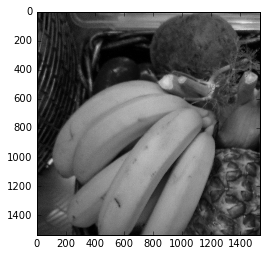

In [36]:
IMAGE_PATH = os.path.join('images', 'fruit.JPG')
# Extract a square block
img = rgb2grey(plt.imread(IMAGE_PATH)[:1536,0:1536])
print img.shape
plt.imshow(img, cmap='gray')
plt.show()

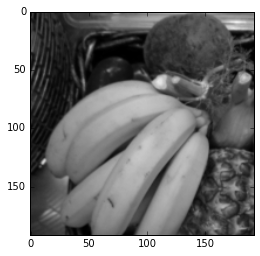

In [37]:
# Scale the image down to 192 x 192
scale_factor = img.shape[0] // 192, img.shape[1] // 192
img_small = downscale_local_mean(img, scale_factor)

plt.imshow(img_small, cmap='gray')
plt.show()

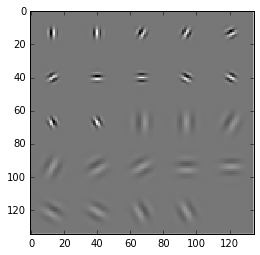

In [19]:
kernels = []
for wavelength in [4.0, 8.0]:
    for theta in np.linspace(0.0, np.pi, 7)[:-1]:
        k_complex = gabor_kernel(1.0/wavelength, theta, 1.2)
        kernels.append(np.imag(k_complex))
        kernels.append(np.real(k_complex))
        
shape = (np.max([k.shape[0]  for k in kernels]), np.max([k.shape[1]  for k in kernels]))

kernels = [pad_image(k, shape)   for k in kernels]

k_3d = np.concatenate([k[None,:,:]   for k in kernels], axis=0)
k_montage = image_montage(k_3d)
plt.imshow(k_montage, cmap='gray', interpolation='none')


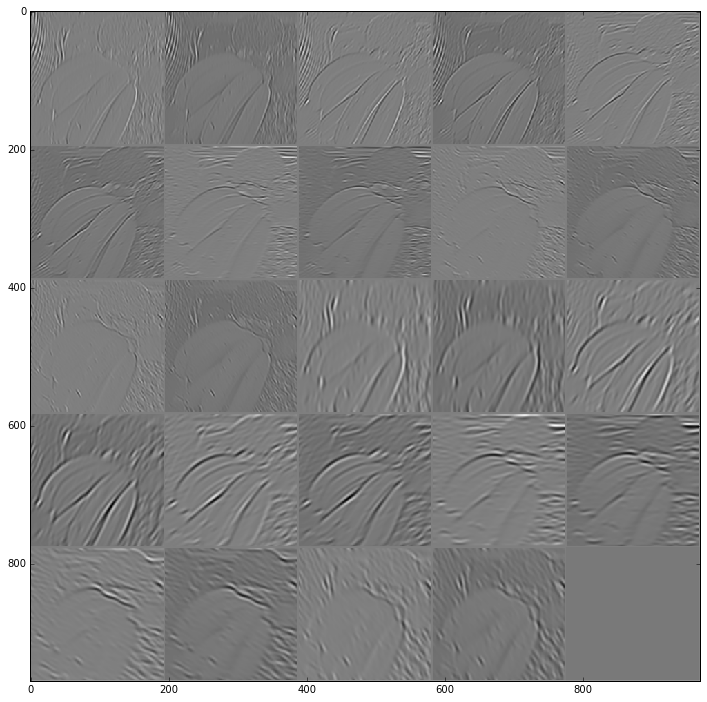

In [38]:
img_features = [-convolve(1-img_small, k)   for k in kernels]

feads_3d = np.concatenate([c[None,:,:]   for c in img_features], axis=0)
feats_montage = image_montage(feads_3d)
plt.figure(figsize=(12,12))
plt.imshow(feats_montage, cmap='gray', interpolation='none')